In [1]:
!pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.15.0-py3-none-any.whl size=30602642 sha256=350c456263f7b157f32c2c57b3434e6bd15f2037e4060acabb19f6e1ca146c61
  Stored in directory: /root/.cache/pip/wheels/9e/34/31/a1682c8249bf2ba89a29498d62c35c08ceb116537b4530d93e
Successfully built kiwipiepy-model


# 데이터전처리

In [2]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi()
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/Othercomputers/내 노트북/study/06_TextAnalytics/data/patents.xlsx')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns, min_df=10)
dtm = cv.fit_transform(df.abstract)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


고빈도 단어 보기

In [5]:
word_count = pd.DataFrame({
    'word': cv.get_feature_names_out(),
    'count': dtm.sum(axis=0).flat
})

word_count.sort_values('count', ascending=False).head(20)

,word,count
145,샴푸,972
83,물,737
92,발명,671
262,조성,615
137,상기,485
80,모발,475
286,추출물,474
315,포함,447
114,부,421
66,량,362


# 잠재 의미 분석

SVD

In [6]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
doc_emb = svd.fit_transform(dtm)

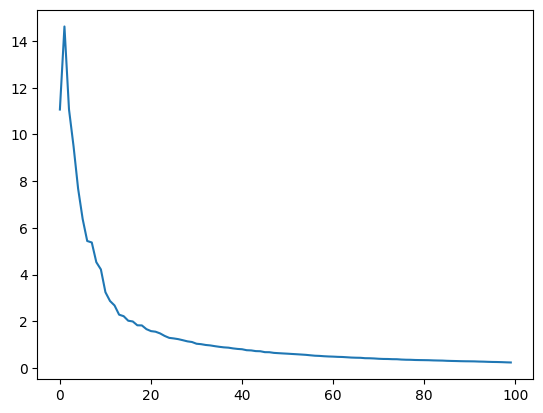

In [7]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)

## 단어임베딩

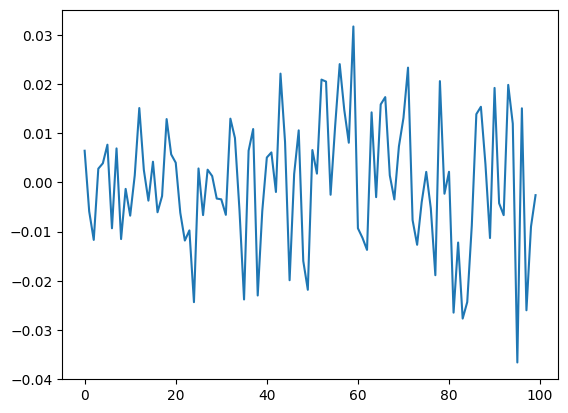

In [8]:
word_emb = svd.components_.T

words = cv.get_feature_names_out().tolist()
i = words.index('윤기')

plt.plot(word_emb[i])

## 코사인 유사도

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)


import numpy as np
s = np.argsort(sim[i])
related = s[-2:-12:-1]
for j in related:
    print(words[j])

탄력
반
조
폴리쿼터늄
구체
베타
혼합물
성물
건조
케어


## 시각화

In [10]:
indices = []
target = ['모발', '손상', '두피', '모공',
          '용기', '내용물']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

dist = 1 - sim[indices, ][:, indices]

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234)
pos = mds.fit_transform(dist)

모발 80
손상 159
두피 62
모공 78
용기 206
내용물 47


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [11]:
!pip install adjusttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from adjustText import adjust_text

In [13]:
!apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (11.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

In [14]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

In [15]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__in

6

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  func(*args, **kw

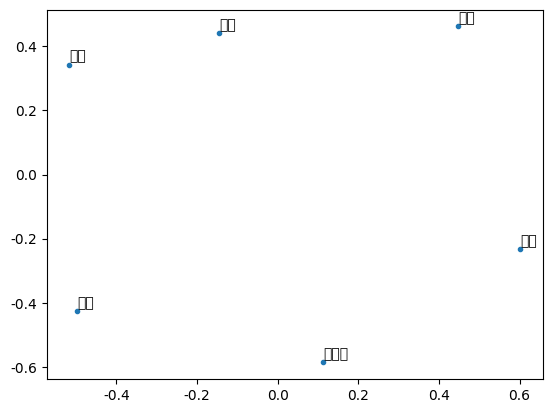

In [16]:
from adjustText import adjust_text
plt.plot(pos[:, 0], pos[:, 1], '.')
texts = [plt.text(pos[i, 0], pos[i, 1], w) for i, w in enumerate(target)]
adjust_text(texts)

In [17]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 38.9 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=00337452846485907de4cce0197a058b6d077d1ef8edfc8347a42615bf8fe457
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


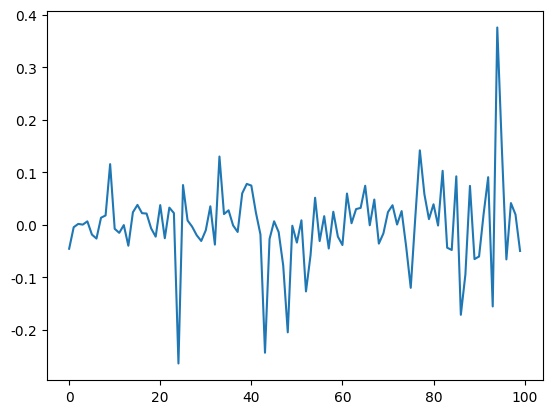

In [18]:
from factor_analyzer.rotator import Rotator
rotator = Rotator()
rot = rotator.fit_transform(word_emb)

plt.plot(rot[i])

In [19]:
t = np.argmax(rot[i])

topic_words_idx = np.argsort(rot[:, t])

for j in topic_words_idx[-1:-11:-1]:
    print(words[j])

내용물
통
디
물질
스펜서
특징
저장
유지
상태
린스


# NMF

In [20]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
svd.fit(dtm)

TruncatedSVD(n_components=100, random_state=1234)

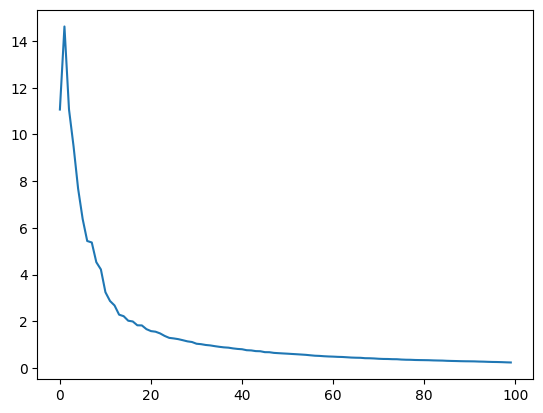

In [21]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)

In [22]:
from sklearn.decomposition import NMF
NUM_TOPICS = 14
nmf = NMF(n_components=NUM_TOPICS)
doc_emb = nmf.fit_transform(dtm)

## 단어임베딩

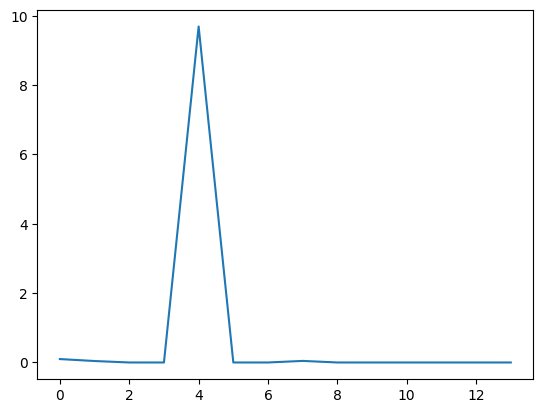

In [23]:
word_emb = nmf.components_.T

words = cv.get_feature_names_out().tolist()
i = words.index('모발')

plt.plot(word_emb[i])

## 코사인 유사도

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)


import numpy as np
s = np.argsort(sim[i])
related = s[-2:-12:-1]
for j in related:
    print(words[j])

손상
염색
염모제
회복
윤기
최소
트리트먼트
피
산
클렌징


## 시각화

In [25]:
indices = []
target = ['모발', '손상', '두피', '모공',
          '용기', '내용물']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

dist = 1 - sim[indices, ][:, indices]

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234)
pos = mds.fit_transform(dist)

모발 80
손상 159
두피 62
모공 78
용기 206
내용물 47


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [26]:
!pip install adjusttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  plt.draw()
/usr/local/lib/python3.9/dist-packages/adjustText/__in

6

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  func(*args, **kw

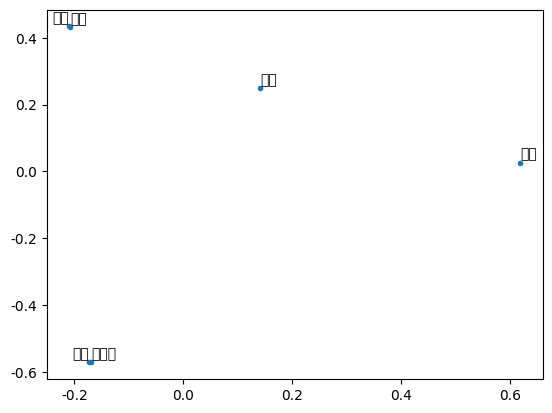

In [27]:
from adjustText import adjust_text
plt.plot(pos[:, 0], pos[:, 1], '.')
texts = [plt.text(pos[i, 0], pos[i, 1], w) for i, w in enumerate(target)]
adjust_text(texts)

In [28]:
for t in range(NUM_TOPICS):
    print(t)
    topic_words_idx = np.argsort(rot[:, t])

    for j in topic_words_idx[-1:-11:-1]:
        print(words[j])

0
물
분해
온도
조성
이온
조
설치
제거
첨가
과
1
량
중
추출액
알로에
정제
복합
활성
어성초
질환
베이스
2
부
조절
계면활성제
예
잎
제어
관리
내부
이
손상
3
중량
복합
과
케어
정제
아미노산
추출액
어성초
유효
베이스
4
단계
가열
교반
혼합물
환경
도포
동안
혼합
방법
온도
5
호스
샤워
이용
방향
연결
재질
머리
추가
조절
제거
6
샴푸
통
부분
이동
바디
의자
이용
제공
과정
펌프
7
모발
방법
도포
아미노산
트리트먼트
성장
건강
표면
복합
유효
8
이용
계면활성제
연결
추출액
토출
혼합
모
내용물
온도
기능
9
용기
내용물
액체
외부
로션
성
보관
연결
수용
펌핑
10
사용자
샤워
이용
상태
표면
로션
환경
과정
마사지
기능
11
탈모
예방
물질
방지
마사지
형태
성장
효능
관리
오일
12
제조
방법
공정
이용
이
베이스
설치
혼합
항산화
비
13
상기
제어
생성
목적
등받이
분해
이온
관리
당귀
화장품


## 문서별 토픽 확인

In [29]:
doc_id = 0
df.iloc[0]

status                                                     등록
ko_title    개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...
en_title    Conditioning shampoo composition containing le...
abstract    본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
Name: 0, dtype: object

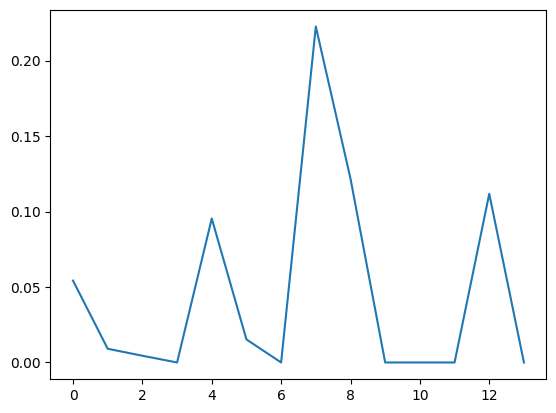

In [30]:
plt.plot(doc_emb[doc_id])

In [31]:
topic_id = np.argmax(doc_emb[doc_id])
topic_id

7

### 가장 강한 토픽 문서 내용

In [32]:
topic_docs_idx = np.argsort(doc_emb[:,topic_id])[-1:-11:-1]
df.iloc[topic_docs_idx]

,status,ko_title,en_title,abstract
96,등록,어성초 쿨링 스피큘 샴푸 조성물,Houttuynia cordata Cooling Spicule Shampoo Com...,"본 발명은 카르본산염형의 아니온성 계면활성제 5 내지 10 중량%, 양성 계면활성제..."
133,등록,천연 추출물이 함유된 기능성 샴푸 조성물 제조방법,Hair shampoo composition including natural ext...,본 발명은 집중 한방추출물을 복합적으로 적용하여 두피와 모발의 건강을 유지함은 물론...
288,등록,황칠나무 발효추출물을 함유한 모발용 화장료 조성물,Hair cosmetic composition containing an extrac...,"본 발명은 모발용 화장료 조성물에 관련되며, 그 조성물에 있어서 (A) 황칠나무 발..."
1,공개,탈모 케어 헤어 샴푸 조성물,A SHAMPOO COMPOSITION FOR CARING HAIR LOSS,"본 발명은 탈모 케어 헤어 샴푸 조성물에 관한 것으로, 보다 상세하게는 소리쟁이 추..."
25,등록,발효 홍삼을 유효성분으로 함유하는 발모촉진용 두피 케어 샴푸 조성물 제조 방법 및 ...,The manufacturing method of shampoo compositio...,본 발명은 소리쟁이를 함유한 지루성두피염 및 탈모완화용 샴푸 제조방법에 관한 것으로...
107,등록,"황련추출물, 박하추출물 및 사해미네랄을 함유하는 비듬방지용 샴푸 조성물",The Dandruff Preventing Hair Cleaner Compositi...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
111,등록,탈모방지 및 발모 촉진용 샴푸,A shampoo for promoting a growith of a hair an...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
278,등록,손상모 재생 및 모발 보호 기능이 우수한 헤어 케어 트리트먼트용 조성물,Composition for hair care treatment,"본 발명은 헤어 케어 트리트먼트용 용액 자체로 사용되거나, 샴푸, 염색제, 모발 케..."
161,공개,천연 산화질소가 함유된 탈모방지 및 발모촉진용 샴푸,Shampoo Composition for Promoting Restoring Ha...,본 발명은 홍삼추출물을 포함한 애완동물용 샴푸의 조성물을 이용하여 애완동물의 피부와...
385,등록,허브추출물 및 영양캡슐을 포함하는 두피 및 모발의 보호 및 세정 조성물,Scalp and hair protecting and cleansing compos...,본 발명은 허브추출물 및 영양캡슐을 포함하는 두피 및 모발의 보호 및 세정 조성물에...


### 토픽 패턴이 가장 비슷한 문서 찾기

In [33]:
sims = cosine_similarity(doc_emb[[doc_id]], doc_emb).flatten()
sim_idx = np.argsort(sims)[-1:-11:-1]
df.iloc[sim_idx]

,status,ko_title,en_title,abstract
0,등록,개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...,Conditioning shampoo composition containing le...,본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
135,등록,컨디셔닝 샴푸 조성물,CONDITIONING SAMPOO COMPOSITION,"본 발명은 모발을 청결하고 건강하게 관리할 수 있음은 물론, 모발 주변의 피부에 발..."
224,등록,막걸리 발효물을 포함하는 샴푸 조성물 및 이의 제조방법,SHAMPOO COMPOSITION COMPRISING MAKGEOLLI FERME...,본 명세서에는 막걸리 발효물을 포함하는 샴푸 조성물 및 이의 제조방법이 개시된다. ...
54,공개,안마겸용 기능성 샴푸대,Function Shampoo Chair,"하르가이(Urtica laetevirens Maxim) 추출물, 어성초(Houttu..."
300,등록,홍삼 추출물 함유 모발용 조성물 및 그 제조방법,Hair Composition Containing Red Ginseng Extrac...,"본 발명은 유효성분으로, 홍삼 추출물; 및 상백피 추출물 및 황금 추출물로 구성된 ..."
381,등록,"상심자, 상엽 또는 상백피를 포함하는 염모제용 조성물 및 이의 제조방법","Composition for hairdye comprising mulberry, m...","본 발명은 상심자, 상엽 또는 상백피를 포함하는 염모제용 조성물에 관한 것으로, 보..."
226,등록,작두콩 추출물을 함유한 샴푸와 그 제조 방법,A SHAMPOO CONTAINING EXTRACTS OF SWORD BEAN AN...,"본 발명은 작두콩 추출물을 함유한 샴푸와 그 제조 방법에 관한 것으로, 보다 상세하..."
198,등록,탈모 방지 및 모발 개선 기능을 갖는 샴푸 조성물,Shampoo composition for preventing hair loss a...,"본 발명은, 약용식물워터를 포함하는 샴푸 조성물에 관한 것으로, 상기 약용식물워터는..."
230,등록,과산화수소와 느릅나무 추출물을 포함하는 친환경 샴푸 조성물 및 이의 제조방법,Eco shampoo composition comprising hydrogen pe...,"본 발명은 과산화 수소, 느릅나무 추출물 및 천연재료 맥아 추출물, 검정콩 추출물,..."
161,공개,천연 산화질소가 함유된 탈모방지 및 발모촉진용 샴푸,Shampoo Composition for Promoting Restoring Ha...,본 발명은 홍삼추출물을 포함한 애완동물용 샴푸의 조성물을 이용하여 애완동물의 피부와...


In [34]:
sims[sim_idx]

array([1.        , 0.92738257, 0.90314698, 0.88039407, 0.87496462,
       0.86991482, 0.85782907, 0.85044268, 0.8495013 , 0.84439253])

# LDA

In [35]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from gensim.matutils import Sparse2Corpus
words = cv.get_feature_names_out().tolist()
corpus = Sparse2Corpus(dtm.T)
id2word = dict(enumerate(words))

In [37]:
corpus[0]

[(80, 1),
 (83, 1),
 (92, 2),
 (96, 1),
 (145, 2),
 (161, 1),
 (218, 1),
 (226, 1),
 (235, 3),
 (254, 1),
 (258, 1),
 (262, 1),
 (269, 1),
 (286, 3),
 (292, 2),
 (315, 1),
 (333, 2),
 (339, 1)]

In [38]:
from gensim.models.ldamodel import LdaModel
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=20,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    iterations=400,
    alpha='auto',
    eta='auto',
    per_word_topics=True)

0번 *토픽*

In [39]:
lda_model.show_topic(0)

[('피부', 0.40752602),
 ('활용', 0.089624114),
 ('질환', 0.07540202),
 ('개선', 0.0625264),
 ('물', 0.059167903),
 ('발명', 0.051084694),
 ('애완동물', 0.047743484),
 ('조성', 0.043528527),
 ('르', 0.035190966),
 ('함량', 0.020266334)]

전체 토픽

In [40]:
lda_model.show_topics()

[(12,
  '0.003*"장점" + 0.003*"작용" + 0.003*"전" + 0.003*"적합" + 0.003*"적용" + 0.003*"저장" + 0.003*"재질" + 0.003*"재료" + 0.003*"장치" + 0.003*"장착"'),
 (15,
  '0.390*"설치" + 0.186*"미용" + 0.095*"의자" + 0.095*"샴푸" + 0.092*"이동" + 0.029*"발명" + 0.016*"제공" + 0.000*"형상" + 0.000*"노즐" + 0.000*"용품"'),
 (17,
  '0.395*"부" + 0.247*"중량" + 0.069*"복수" + 0.046*"포함" + 0.032*"케어" + 0.022*"물" + 0.020*"조성" + 0.017*"샴푸" + 0.014*"추출물" + 0.012*"특징"'),
 (16,
  '0.221*"상기" + 0.128*"액" + 0.107*"단계" + 0.088*"샴푸" + 0.056*"방법" + 0.055*"포함" + 0.044*"폴리" + 0.042*"실록" + 0.038*"비" + 0.035*"화합물"'),
 (2,
  '0.182*"연결" + 0.118*"방향" + 0.080*"고정" + 0.080*"작동" + 0.072*"가능" + 0.058*"등받이" + 0.056*"회전" + 0.054*"수단" + 0.048*"단" + 0.040*"받침대"'),
 (6,
  '0.078*"추출물" + 0.051*"한방" + 0.039*"수" + 0.036*"제형" + 0.034*"혼합물" + 0.033*"표면" + 0.033*"조성" + 0.031*"감초" + 0.029*"성분" + 0.028*"함유"'),
 (9,
  '0.120*"방지" + 0.119*"탈모" + 0.090*"발" + 0.077*"조성" + 0.077*"물" + 0.070*"촉진" + 0.054*"효과" + 0.052*"발명" + 0.050*"모" + 0.050*"샴푸"'),
 (5,
  '0.153*"용기" + 0.059*

특정 단어와 관련된 토픽

In [41]:
word_idx = words.index('모발')
lda_model.get_term_topics(word_idx)

[(18, 0.10478656), (19, 0.021293838)]

문서별 토픽

In [42]:
doc_idx = 0
lda_model.get_document_topics(corpus[doc_idx])

[(4, 0.101975344),
 (6, 0.32842994),
 (13, 0.1566101),
 (18, 0.3325758),
 (19, 0.03311223)]

평가

로그 혼란도 (0에 가까울 수록 성능이 높음)

In [43]:
lda_model.log_perplexity(corpus)

-5.614763519768266

다양도(1에 가까울 수록 성능이 높음)

In [44]:
topn = 25
top_words = set()

for topic in range(lda_model.num_topics):
    for word, prob in lda_model.show_topic(topic, topn=topn):
        top_words.add(word)

len(top_words) / (lda_model.num_topics * topn)

0.552

## 시각화

In [45]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97736 sha256=977670ff0c8757325b6b51880b59e21bc0dd8b38060661800323f27da3e20884
  Stored in directory: /root/.cache/pip/wheels/59/70/ee/99a0df99d8b4a7b87c79640ebee0927c0f6ccff046e9cc2471
Successfully built pyLDAvis


In [46]:
from gensim.corpora.dictionary import Dictionary
dic = Dictionary()
dic.id2token = id2word
dic.token2id = {w: i for i, w in id2word.items()}

In [47]:
import pyLDAvis.gensim
p = pyLDAvis.gensim.prepare(
lda_model, corpus, dic, sort_topics=False)
pyLDAvis.display(p)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


# 문장 BERT를 이용한 키워드 추출

In [48]:
!pip install sentence_transformers

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=252009fb9cc705b393f122f5a1b6185e9dca3b95afca3e021641207d6275ccc0
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [49]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 비슷한 문서 보기

문장 임베딩

In [51]:
doc_emb = model.encode(df['abstract'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


비슷한 문서 찾기

In [52]:
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

doc_idx = 0
dists = cosine_distances(doc_emb[[doc_idx]], doc_emb).flatten()
df.iloc[np.argsort(dists)[:10]]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,status,ko_title,en_title,abstract
0,등록,개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...,Conditioning shampoo composition containing le...,본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
179,등록,생약추출액이 함유된 샴푸조성물,Shampoo composition,본 발명은 두피와 모발의 세정효과가 우수할 뿐만 아니라 두피와 모발의 건강을 유지시...
133,등록,천연 추출물이 함유된 기능성 샴푸 조성물 제조방법,Hair shampoo composition including natural ext...,본 발명은 집중 한방추출물을 복합적으로 적용하여 두피와 모발의 건강을 유지함은 물론...
182,등록,두피 및 모발 상태 개선용 샴푸 조성물,Shampoo composition for improving state of sca...,"본 발명은 두피 및 모발 상태 개선용 샴푸 조성물에 관한 것으로, 더욱 상세하게는 ..."
113,공개,친환경 원료를 사용한 두피 건강용 샴푸,Scalp health shampoo using eco-friendly ingred...,"본 발명은 편백잎, 솔잎, 잣나무잎, 녹차잎 및 병풀을 전해환원수와 혼합하여 발효시..."
196,등록,식물 추출물 및 천연 계면활성제를 함유하는 천연 샴푸 조성물,Natural shampoo composition comprising plant e...,"본 발명은 편백잎, 솔잎, 잣나무잎, 녹차잎 및 병풀을 전해환원수와 혼합하여 발효시..."
198,등록,탈모 방지 및 모발 개선 기능을 갖는 샴푸 조성물,Shampoo composition for preventing hair loss a...,"본 발명은, 약용식물워터를 포함하는 샴푸 조성물에 관한 것으로, 상기 약용식물워터는..."
111,등록,탈모방지 및 발모 촉진용 샴푸,A shampoo for promoting a growith of a hair an...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
107,등록,"황련추출물, 박하추출물 및 사해미네랄을 함유하는 비듬방지용 샴푸 조성물",The Dandruff Preventing Hair Cleaner Compositi...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
206,등록,샴푸 조성물,SHAMPOO COMPOSITION,"본 발명은 샴푸 조성물에 관한 것으로, 정제수, 글루카메이트, 폴리쿼터, 판테놀, ..."


키워드 추출

In [53]:
word_emb = model.encode(words)
dists = cosine_distances(doc_emb[[doc_idx]], word_emb).flatten()
for i in np.argsort(dists)[:5]:
    print(words[i])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


첨가제
추출물
추출액
화합물
계면활성제


## Max Sum Similarity

In [54]:
from scipy.special import factorial
n = 10
k = 5
factorial(n)/factorial(n-k)/factorial(k)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


252.0

In [57]:
import itertools

max_dist = 0
max_combi = None
candidates = np.argsort(dists)[:n]
for combi in itertools.combinations(candidates, k):
    word_dists = cosine_distances(word_emb[list(combi)])
    sum_dist = word_dists.sum()
    if sum_dist > max_dist:
        max_dist = sum_dist
        max_combi = combi

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
max_dist

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.816771

In [59]:
for i in max_combi:
    print(words[i])

추출액
계면활성제
보습제
천연
두피


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Maximal Marginal Relevance

첫번째 키워드는 문서와 가장 비슷한 것으로 선택

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
diversity = 0.5
keyword, *candidates = np.argsort(dists)[:n].tolist()
keywords = [keyword]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


나머지 키워드를 하나씩 추가

In [61]:
for _ in range(k - 1):
    # 문서와 유사도 계산
    doc_sims = cosine_similarity(doc_emb[[doc_idx]], word_emb[candidates])[0]
    # 키워드와 유사도 계산
    keyword_sims = cosine_similarity(word_emb[keywords], word_emb[candidates])
    # 가장 높은 키워드 유사도를 선택
    keyword_sims = np.max(keyword_sims, axis=0)
    # MMR: 문서와는 비슷하고, 기존 키워드와는 달라야함
    mmr = (1 - diversity) *  doc_sims - diversity * keyword_sims
    # MMR이 가장 높은 키워드 위치
    most_similar_idx = np.argmax(mmr)
    # 후보에서 해당 키워드를 선택
    keyword = candidates[most_similar_idx]
    # 새 키워드 추가
    keywords.append(keyword)
    # 추가된 키워드는 후보에서 제거
    candidates.remove(keyword)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
